In [1]:
import numpy as np
import random 
import pandas as pd
import matplotlib.pyplot as plt 

from regression_utils import *

np.set_printoptions(suppress=True)
%matplotlib inline

In [2]:
# convention followed in relation to scikit documentation 
# y = countryQuantity 
# y1 = countryQuantityTrain
# Y = countryQuantityTest
# y_pred = countryQuantityPredict

# X = years 
# X1 = yearsTrain
# x_mis = yearsTest
# x = yearsPredict

# c = combinedZip

1186    68.3
1187    68.0
1188    67.6
1189    67.3
1190    66.8
1191    66.4
1192    66.0
1193    65.5
1194    65.2
1195    64.8
1196    64.4
1197    64.0
1198    63.7
1199    63.3
1200    62.9
1201    62.5
Name: Life expectancy, dtype: float64
1186    2015
1187    2014
1188    2013
1189    2012
1190    2011
1191    2010
1192    2009
1193    2008
1194    2007
1195    2006
1196    2005
1197    2004
1198    2003
1199    2002
1200    2001
1201    2000
Name: Year, dtype: int64
1186     0.000000
1187    86.521539
1188    67.672304
1189    64.969645
1190    64.605901
1191    57.733599
1192     0.844186
1193    43.030433
1194     5.234770
1195    34.859427
1196     3.509637
1197    27.338009
1198    19.480868
1199    17.812056
1200    19.003406
1201    19.266157
Name: percentage expenditure, dtype: float64


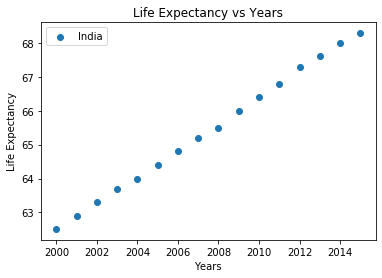

Train:Test split is:  11 : 5


In [3]:
#reading data from csv 
df = pd.read_csv('datasets_12603_17232_Life Expectancy Data.csv')

# Quantity variation of 3 countries (Germany, Netherlands, Spain)
# change here 
country = 'India'
countryDataFrame = countryDF(country, df)
countryQuantity = columnExtractor(countryDataFrame,'Life expectancy')
print(countryQuantity)
    
years = columnExtractor(countryDataFrame,'Year')
print(years)

percentage_expenditure = columnExtractor(countryDataFrame,'percentage expenditure')
print(percentage_expenditure)

#plotQuantities(years, countryQuantity,'Years','Population', country,'Population vs Years')
plotQuantities(years, countryQuantity, 'Years', 'Life Expectancy', country, 'Life Expectancy vs Years')

split = np.random.randint(1,15)
countryQuantityTrain, yearsTrain, countryQuantityTest, yearsTest = randomizer(countryQuantity, years, split)


length scale is:  1


/home/mihir/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:357: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


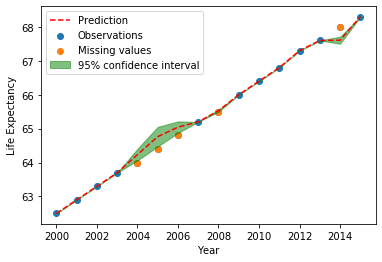

In [4]:
countryQuantityPredict, sigma = gaussianRegression(yearsTrain, countryQuantityTrain, yearsTest, countryQuantityTest, years, countryQuantity) 

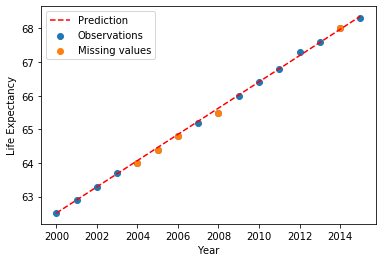

In [5]:
countryQuantityPredictLR = linearRegression(yearsTrain, countryQuantityTrain, yearsTest, countryQuantityTest, years, countryQuantity)

GPR Prediction 
 [[62.5        62.9        63.3        63.7        64.23470543 64.76318006
  65.04423731 65.2        65.52966965 66.         66.39999999 66.80000001
  67.3        67.6        67.60742243 68.3       ]]
Actual 
 [62.5, 62.9, 63.3, 63.7, 64.0, 64.4, 64.8, 65.2, 65.5, 66.0, 66.4, 66.8, 67.3, 67.6, 68.0, 68.3]
GPR error:  [[0.         0.         0.         0.         0.36672724 0.5639442
  0.37690944 0.         0.04529717 0.         0.00000001 0.00000001
  0.00000001 0.         0.57731996 0.        ]]
mean absolute percentage error GPR :  0.12063737770351046
------------------------------------------
LR Prediction 
 [[62.51047963 62.90065703 63.29083443 63.68101183 64.07118922 64.46136662
  64.85154402 65.24172142 65.63189882 66.02207622 66.41225361 66.80243101
  67.19260841 67.58278581 67.97296321 68.3631406 ]]
Actual 
 [62.5, 62.9, 63.3, 63.7, 64.0, 64.4, 64.8, 65.2, 65.5, 66.0, 66.4, 66.8, 67.3, 67.6, 68.0, 68.3]
LR error  [[0.01676741 0.00104456 0.01447958 0.02980875 0.1

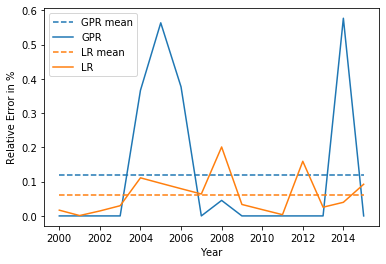

In [6]:
# error computation for GPR 
years = columnExtractor(countryDataFrame,'Year').tolist()
error = errorComputation(countryDataFrame, countryQuantityPredict, 'Life expectancy',regression_type='GPR')
print('GPR error: ',error)
errorPlot(years, error, 'Year', 'Relative Error in %',regression_type='GPR',color='#1f77b4')

print('------------------------------------------')

years = columnExtractor(countryDataFrame,'Year').tolist()
error = errorComputation(countryDataFrame, countryQuantityPredictLR, 'Life expectancy',regression_type='LR')
print('LR error ',error)
errorPlot(years, error, 'Year', 'Relative Error in %',regression_type='LR',color='#ff7f0e')

plt.show()


#go with rmse for outliers 
#try using normalization